In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
# Deep Learning Libraries
from tensorflow.keras import datasets, layers, models, losses, Model
from keras.callbacks import ReduceLROnPlateau, LearningRateScheduler
from keras import optimizers
from keras.preprocessing.image import ImageDataGenerator
from keras.utils import plot_model
from sklearn.metrics import confusion_matrix, accuracy_score, precision_recall_fscore_support



In [ ]:
%tensorflow_version 2.x
import tensorflow as tf
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

Found GPU at: /device:GPU:0


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
def accuracy_loss_plot(history):
    plt.Figure()
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Model accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Val'], loc='lower right')
    plt.yticks(np.arange(0, 1, step=0.1)) 
    plt.show()
    plt.Figure()
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model loss')
    plt.ylabel('loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Val'], loc='lower right')
    plt.yticks(np.arange(0, 1, step=0.1)) 
    plt.show()
    plt.Figure()
    plt.plot(history.history['loss'])
    plt.plot(history.history['accuracy'])
    plt.title('Loss vs Accuracy')
    plt.ylabel('Loss/Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Loss', 'Accuracy'], loc='lower right')
    plt.yticks(np.arange(0, 1, step=0.1)) 
    plt.show()

In [ ]:
def plot_augmented_data(X_train, y_train):
# define number of rows & columns
  num_row = 2
  num_col = 8
  num= num_row*num_col

# plot after
  fig2, axes2 = plt.subplots(num_row, num_col, figsize=(1.5*num_col,2*num_row))
  for X, Y in datagen.flow(X_train,y_train,batch_size=num,shuffle=False):
      for i in range(0, num):
            ax = axes2[i//num_col, i%num_col]
            ax.imshow(X[i].reshape(28,28), cmap='gray_r')
            ax.set_title('Label: {}'.format(int(Y[i])))
      break
  plt.tight_layout()
  plt.show()

In [ ]:
import itertools  
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=90)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [ ]:
def replace_values(arr, original, sub):
  s = pd.Series(arr)
  target = s.replace(original, sub)
  target = target.to_numpy()
  return target


In [ ]:
def compare_accuracy_loss(history_list):
    n_models = len(history_list)
    fig, axs = plt.subplots(n_models, 3, figsize=(10, 16))

    for i in range(n_models):
        title = 'Model ' + str(i+1)
        axs[i, 0].plot(history_list[i].history['accuracy'])
        axs[i, 0].plot(history_list[i].history['val_accuracy'])
        axs[i, 0].legend(['Train', 'Val'], loc='lower right')
        axs[i, 0].set_title(title , y=1.0, pad=-60)
        axs[i, 0].set(ylabel='Accuracy')
        axs[i, 1].plot(history_list[i].history['loss'])
        axs[i, 1].plot(history_list[i].history['val_loss'])
        axs[i, 1].legend(['Train', 'Val'], loc='upper right')
        axs[i, 1].set_title(title, y=1.0, pad=-60)
        axs[i, 1].set(ylabel='Loss')
        axs[i, 2].plot(history_list[i].history['loss'])
        axs[i, 2].plot(history_list[i].history['accuracy'])
        axs[i, 2].legend(['Loss', 'Accuracy'], loc='upper right')
        axs[i, 2].set_title(title, y=1.0, pad=-60)
        axs[i, 2].set(ylabel='Loss')

    for i in range((n_models * 2) - 2, n_models * 2):
        axs.flat[i].set(xlabel='Epoch')

In [ ]:
def print_accuracy(model, y_train, y_val, y_test, mode = 0):
    global X_train, X_val, X_test
    global X_train_tl, X_val_tl, X_test_tl
    
    if mode == 0:
        y_pred_train = np.argmax(model.predict(X_train), axis=-1)
        y_pred_val = np.argmax(model.predict(X_val), axis=-1)
        y_pred_test = np.argmax(model.predict(X_test), axis=-1)
    else:
        y_pred_train = np.argmax(model.predict(X_train_tl), axis=-1)
        y_pred_val = np.argmax(model.predict(X_val_tl), axis=-1)
        y_pred_test = np.argmax(model.predict(X_test_tl), axis=-1)
    
    preds = [y_pred_train, y_pred_val, y_pred_test]
    trues = [y_train, y_val, y_test]
    
    tag = ['Train', 'Val', 'Test']
    
    for i in range(3):
        accuracy = accuracy_score(trues[i], preds[i])
        metric = list(precision_recall_fscore_support(trues[i], preds[i], average='macro'))
        print(tag[i], 'Set Accuracy: \t', round(accuracy * 100, 2))
        print(tag[i], 'Set Precision: \t', round(metric[0], 2))
        print(tag[i], 'Set Recall: \t', round(metric[1], 2))
        print(tag[i], 'Set F score: \t', round(metric[2], 2))
        print()

In [ ]:
data = np.load('/content/drive/MyDrive/mnist/fashion_mnist_dataset_train.npy', allow_pickle=True).item()

In [ ]:
data


{'features': array([[[0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         ...,
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.]],
 
        [[0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         ...,
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.]],
 
        [[0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         ...,
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.]],
 
        ...,
 
        [[0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         ...,
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0

In [ ]:
data['target'].shape

(60000,)

In [ ]:
target = replace_values(data['target'], [1, 2, 3, 4, 5], [0, 1, 2, 3, 4])

In [ ]:
target.shape

(60000,)

In [ ]:
from sklearn.model_selection import train_test_split
# Splitting the data into train, test, and validation sets
X_train, X_test, y_train, y_test = train_test_split(data['features'], target, test_size=0.2, random_state=275)
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=0.5, random_state=275)

In [ ]:
X_train.shape

(48000, 28, 28)

In [ ]:
X_val.shape

(6000, 28, 28)

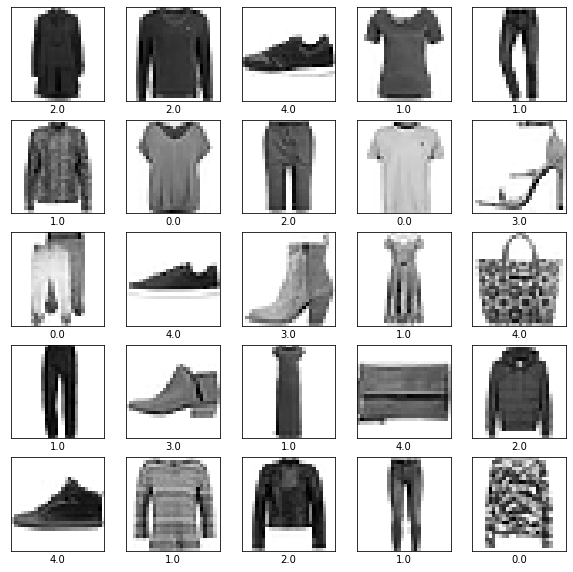

In [ ]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_train[i], cmap=plt.cm.binary)
    plt.xlabel(y_train[i])
plt.show()

In [ ]:
#plot the label distribution
import pandas as pd
df_label = pd.DataFrame(data['target'])

In [ ]:
df_label.head()

,0
0,5.0
1,2.0
2,1.0
3,2.0
4,1.0


In [ ]:
df_label.value_counts()

2.0    12019
3.0    12011
4.0    11992
5.0    11989
1.0    11989
dtype: int64

In [ ]:
X_train = X_train.reshape((-1, 28, 28, 1))
X_val = X_val.reshape((-1, 28, 28, 1))
X_test = X_test.reshape((-1, 28, 28, 1))

## Brief Model

In [ ]:
model_brief=models.Sequential()
model_brief.add(layers.Conv2D(32, (3,3) , padding='same',activation='relu', input_shape=(28,28,1)))
model_brief.add(layers.BatchNormalization())
model_brief.add(layers.MaxPooling2D(pool_size=(2,2)))

model_brief.add(layers.Flatten())
model_brief.add(layers.Dense(128, activation='relu'))
model_brief.add(layers.Dense(5, activation='softmax'))

In [ ]:
model_brief.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 32)        320       
_________________________________________________________________
batch_normalization (BatchNo (None, 28, 28, 32)        128       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 6272)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               802944    
_________________________________________________________________
dense_1 (Dense)              (None, 5)                 645       
Total params: 804,037
Trainable params: 803,973
Non-trainable params: 64
_________________________________________________

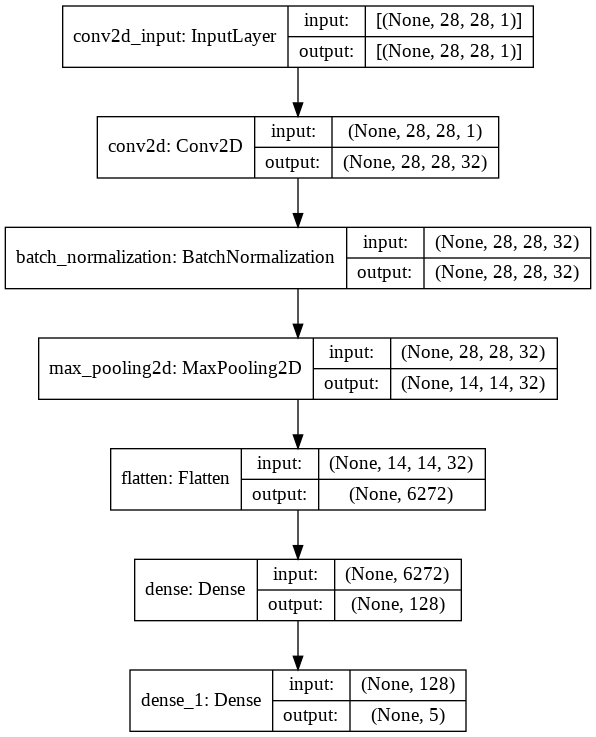

In [ ]:
plot_model(model_brief, show_shapes=True, rankdir="TD")

### Description of brief Model

This model is a concise model consisting of one convolutional layer as described by [1]. The convolutional layer has 32 filters of size 3 x 3. This is followed by Batch Normalization.

Batch normalization is a technique for training very deep neural networks that standardizes the inputs to a layer for each mini-batch. This has the effect of stabilizing the learning process and dramatically reducing the number of training epochs required to train deep networks. We normalize each layer's inputs by using the mean and variance of the values in the current batch.

This is followed by a max pooling layer which reduces the spatial dimensions by downsampling the feature mask from 28 x 28 to 14 x 14.

The output of the dense layer is flattened and passed to a dense or fully connected layer. The final output layer contains 5 nodes for each of the five classes.

In [ ]:
model_brief.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
%%time
with tf.device('/device:GPU:0'):
  history = model_brief.fit(X_train, y_train, epochs=100, 
                    validation_data=(X_val, y_val), batch_size=128)

Epoch 1/100
375/375 [==============================] - 4s 5ms/step - loss: 0.6951 - accuracy: 0.7429 - val_loss: 0.5559 - val_accuracy: 0.8400
Epoch 2/100
375/375 [==============================] - 1s 3ms/step - loss: 0.2919 - accuracy: 0.8837 - val_loss: 0.2748 - val_accuracy: 0.8910
Epoch 3/100
375/375 [==============================] - 1s 3ms/step - loss: 0.2315 - accuracy: 0.9089 - val_loss: 0.3020 - val_accuracy: 0.8800
Epoch 4/100
375/375 [==============================] - 1s 3ms/step - loss: 0.1933 - accuracy: 0.9236 - val_loss: 0.2442 - val_accuracy: 0.9055
Epoch 5/100
375/375 [==============================] - 1s 3ms/step - loss: 0.1648 - accuracy: 0.9353 - val_loss: 0.2931 - val_accuracy: 0.8893
Epoch 6/100
375/375 [==============================] - 1s 3ms/step - loss: 0.1395 - accuracy: 0.9456 - val_loss: 0.3399 - val_accuracy: 0.8800
Epoch 7/100
375/375 [==============================] - 1s 3ms/step - loss: 0.1297 - accuracy: 0.9498 - val_loss: 0.2718 - val_accuracy: 0.9078

In [ ]:
%%time
with tf.device('/device:GPU:0'):
  test_loss, test_acc = model_brief.evaluate(X_test,  y_test, verbose=2)
print("Test of accuracy of brief model", test_acc)

188/188 - 0s - loss: 1.0568 - accuracy: 0.8957
Test of accuracy of brief model 0.8956666588783264
CPU times: user 355 ms, sys: 43.4 ms, total: 398 ms
Wall time: 279 ms


In [ ]:
print_accuracy(model_brief, y_train, y_val, y_test)

Train Set Accuracy: 	 99.81
Train Set Precision: 	 1.0
Train Set Recall: 	 1.0
Train Set F score: 	 1.0

Val Set Accuracy: 	 89.32
Val Set Precision: 	 0.89
Val Set Recall: 	 0.89
Val Set F score: 	 0.89

Test Set Accuracy: 	 89.57
Test Set Precision: 	 0.9
Test Set Recall: 	 0.9
Test Set F score: 	 0.9



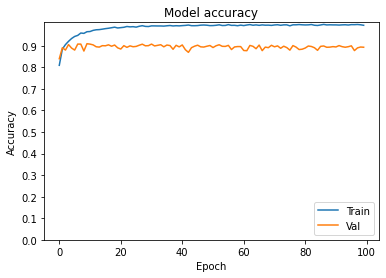

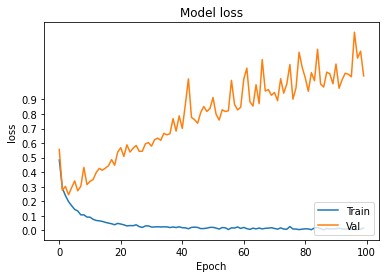

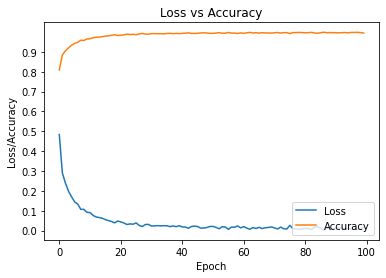

In [ ]:
accuracy_loss_plot(history)

In [ ]:
history_list = []
history_list.append(history)

### Explanation of Brief Model Plots

#### Accuracy plots
This model achieves an accuracy of up to 99.81% on the training data. However, it achieves only 89.37% and 89.57% accuracy on the validation and test sets respectively. From the accuracy graph above, there is a large gap between the training and validation accuracy per epoch.
#### Loss plots
There is also a relatively large gap between the losses per epoch in the training and validation sets. This represents possible overfitting.

#### Reason for overfitting
- This is most likely due to the lack of regularization

## Deeper Model

In [ ]:
#output softmax layer should have 5 outputs
# Building a ConvNet
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(layers.Dropout(0.25))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.25))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(5, activation='softmax'))

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 14, 14, 32)        128       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
dropout (Dropout)            (None, 14, 14, 64)        0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 7, 7, 64)         

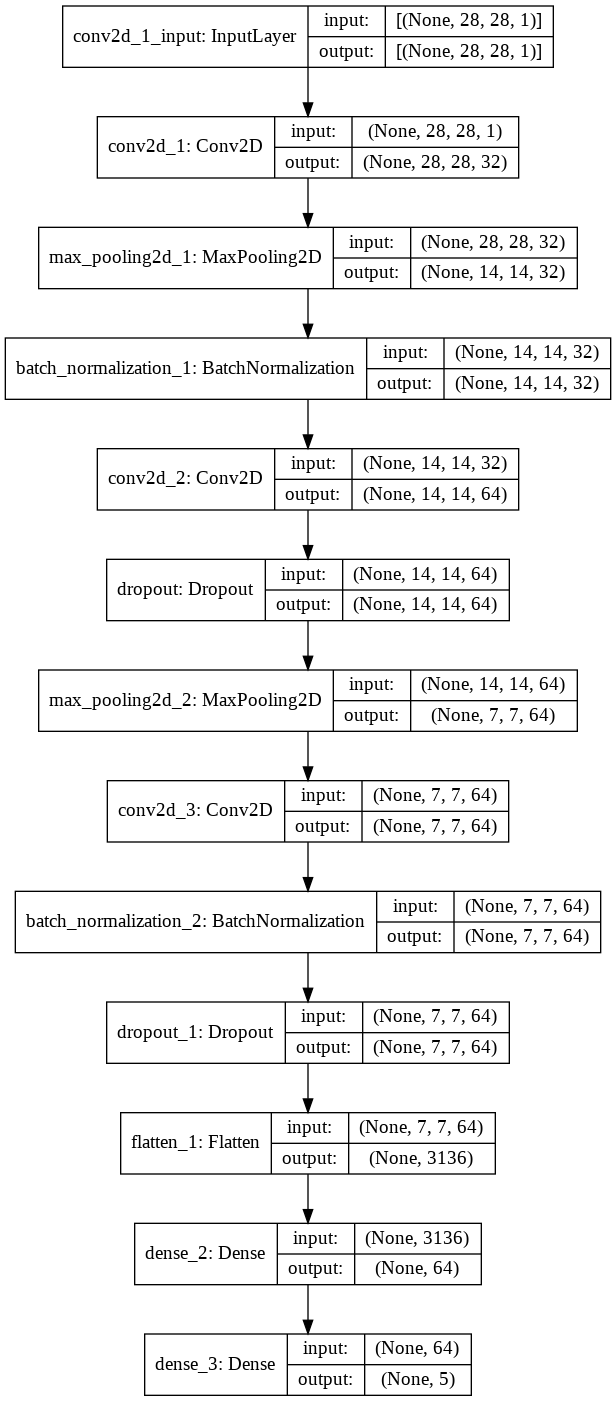

In [ ]:
plot_model(model, show_shapes=True, rankdir="TD")

### Description of Deeper Model

This model is a deeper model consisting of three convolutional layers partially influenced by the model described in [x]. The convolutional layer has 32 filters of size 3 x 3. This is followed by a MaxPooling layer of size 2 x 2 and Batch Normalization. The Max pooling layer reduces the spatial dimensions by half. 

The second layer has 64 filters, also of size 3 x 3. This is followed by a dropout layer for reqularization and a max pooling layer. Dropout is a regularization method that approximates training a large number of neural networks with different architectures in parallel.

During training, some number of layer outputs are randomly ignored or “dropped out.” This has the effect of making the layer look-like and be treated-like a layer with a different number of nodes and connectivity to the prior layer. In effect, each update to a layer during training is performed with a different “view” of the configured layer.

The final convolutional layer also contains 64 filters and is followed by Batch Normalization and Dropout. 

The output of the dense layer is flattened and passed to a dense or fully connected layer. The final output layer contains 5 nodes for each of the five classes. The final layer utilises the softmax activation function since there are multiple output classes.

In [ ]:
%%time
with tf.device('/device:GPU:0'):
  model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
  history_deeper = model.fit(X_train, y_train, epochs=100, 
                    validation_data=(X_val, y_val), batch_size=128)

Epoch 1/100
375/375 [==============================] - 2s 5ms/step - loss: 0.6385 - accuracy: 0.7450 - val_loss: 1.1492 - val_accuracy: 0.4713
Epoch 2/100
375/375 [==============================] - 2s 5ms/step - loss: 0.3366 - accuracy: 0.8644 - val_loss: 0.4337 - val_accuracy: 0.8197
Epoch 3/100
375/375 [==============================] - 2s 5ms/step - loss: 0.2915 - accuracy: 0.8814 - val_loss: 0.4222 - val_accuracy: 0.8238
Epoch 4/100
375/375 [==============================] - 2s 5ms/step - loss: 0.2638 - accuracy: 0.8926 - val_loss: 0.3331 - val_accuracy: 0.8712
Epoch 5/100
375/375 [==============================] - 2s 5ms/step - loss: 0.2406 - accuracy: 0.9033 - val_loss: 0.3855 - val_accuracy: 0.8453
Epoch 6/100
375/375 [==============================] - 2s 5ms/step - loss: 0.2271 - accuracy: 0.9100 - val_loss: 0.3003 - val_accuracy: 0.8770
Epoch 7/100
375/375 [==============================] - 2s 5ms/step - loss: 0.2114 - accuracy: 0.9151 - val_loss: 0.3842 - val_accuracy: 0.8472

In [ ]:
%%time
with tf.device('/device:GPU:0'):
  test_loss, test_acc = model_brief.evaluate(X_test,  y_test, verbose=2)
print("Test of accuracy of brief model", test_acc)

188/188 - 0s - loss: 1.0568 - accuracy: 0.8957
Test of accuracy of brief model 0.8956666588783264
CPU times: user 361 ms, sys: 32.9 ms, total: 394 ms
Wall time: 298 ms


In [ ]:
history_list.append(history_deeper)

In [ ]:
print_accuracy(model, y_train, y_val, y_test)

Train Set Accuracy: 	 99.53
Train Set Precision: 	 1.0
Train Set Recall: 	 1.0
Train Set F score: 	 1.0

Val Set Accuracy: 	 91.95
Val Set Precision: 	 0.92
Val Set Recall: 	 0.92
Val Set F score: 	 0.92

Test Set Accuracy: 	 91.77
Test Set Precision: 	 0.92
Test Set Recall: 	 0.92
Test Set F score: 	 0.92



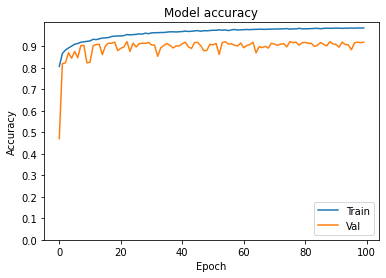

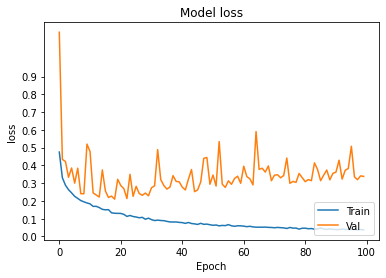

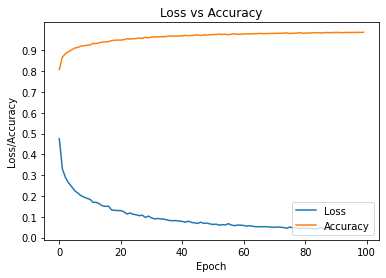

In [ ]:
accuracy_loss_plot(history_deeper)

### Explanation of deeper Model plots

#### Accuracy plots
This model achieves an accuracy of up to 99.53% on the training data. However, it achieves  91.95% accuracy on the validation and 91.77% on the test set. From the accuracy graph above, there is a significant gap between the training and validation accuracy per epoch. This is much smaller than the gap in the brief model. 
#### Loss plots
There is also a significant gap between the losses per epoch in the training and validation sets. This represents possible overfitting.

#### Observations
- This model has less overfitting than the previous model because of the addition of dropout layers.

### Data Augmentation
This a technique used to increase the diversity of your training set by applying random (but realistic) transformations such as image rotation. Increasing the data in this way, could make the model better at generalizing to new data. In this way, data augmentation acts as a regularizer. 


#### Types of Augmentation Used to update our Deeper model
1. Rotation:

  A rotation augmentation randomly rotates the image clockwise by a given number of degrees from 0 to 360. Our model supplies random rotations via the rotation_range argument, with rotations to the image between 0 and 8 degrees.
2. Zoom:

  A zoom augmentation randomly zooms the image in and either adds new pixel values around the image or interpolates pixel values respectively.
3. Shear:

 Shear' means that the image will be distorted along an axis, mostly to create or rectify the perception angles. For example, if a image appears as a rectangle, applying would make it resemble a parallelogram. It's usually used to augment images so that computers can see how humans see things from different angles.
4. Flip:
  
  An image flip means reversing the rows or columns of pixels in the case of a vertical or horizontal flip respectively. In this model, we make use of a vertical flip.
5. Width/Height Shift:

   A shift to an image means moving all pixels of the image in one direction, such as horizontally(width shift) or vertically(horizontal shift), while keeping the image dimensions the same.

In [ ]:
datagen = ImageDataGenerator(
        rotation_range = 8,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.1, # Randomly zoom image 
        shear_range = 0.3,# shear angle in counter-clockwise direction in degrees  
        width_shift_range=0.08,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.08,  # randomly shift images vertically (fraction of total height)
        vertical_flip=True)  # randomly flip images

In [ ]:
datagen.fit(X_train)

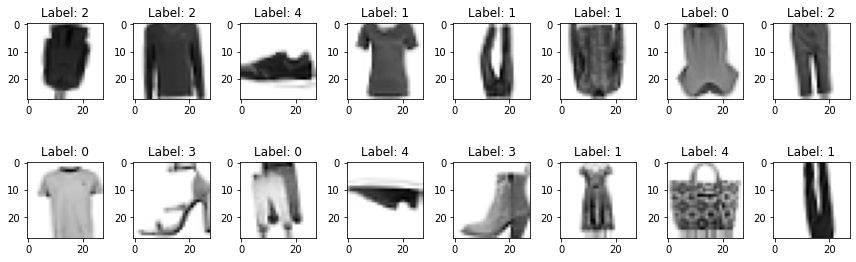

CPU times: user 1.8 s, sys: 139 ms, total: 1.94 s
Wall time: 1.78 s


In [ ]:
%%time
plot_augmented_data(X_train, y_train)


This plot above shows the effect of the data augmentation techniques applied above. 

In [ ]:
%%time
batch_size = 128
epochs = 100
reduce_lr = LearningRateScheduler(lambda x: 1e-3 * 0.9 ** x)
with tf.device('/device:GPU:0'):
  # Fit the Model
  history = model.fit(datagen.flow(X_train, y_train, batch_size = batch_size), epochs = epochs, 
                              validation_data = (X_val, y_val), verbose=2, 
                              steps_per_epoch=X_train.shape[0] // batch_size,
                              callbacks = [reduce_lr])

Epoch 1/100
375/375 - 12s - loss: 0.6391 - accuracy: 0.7620 - val_loss: 0.3285 - val_accuracy: 0.8707
Epoch 2/100
375/375 - 11s - loss: 0.4706 - accuracy: 0.8075 - val_loss: 0.3014 - val_accuracy: 0.8835
Epoch 3/100
375/375 - 11s - loss: 0.4408 - accuracy: 0.8197 - val_loss: 0.3003 - val_accuracy: 0.8823
Epoch 4/100
375/375 - 11s - loss: 0.4143 - accuracy: 0.8302 - val_loss: 0.3006 - val_accuracy: 0.8773
Epoch 5/100
375/375 - 12s - loss: 0.4043 - accuracy: 0.8350 - val_loss: 0.3073 - val_accuracy: 0.8728
Epoch 6/100
375/375 - 11s - loss: 0.3922 - accuracy: 0.8377 - val_loss: 0.2821 - val_accuracy: 0.8887
Epoch 7/100
375/375 - 12s - loss: 0.3834 - accuracy: 0.8425 - val_loss: 0.2750 - val_accuracy: 0.8942
Epoch 8/100
375/375 - 11s - loss: 0.3755 - accuracy: 0.8466 - val_loss: 0.2943 - val_accuracy: 0.8772
Epoch 9/100
375/375 - 12s - loss: 0.3663 - accuracy: 0.8498 - val_loss: 0.3077 - val_accuracy: 0.8712
Epoch 10/100
375/375 - 12s - loss: 0.3628 - accuracy: 0.8509 - val_loss: 0.3017 - 

In [ ]:
%%time
with tf.device('/device:GPU:0'):
  test_loss, test_acc = model.evaluate(X_test,  y_test, verbose=2)
print(test_acc)

188/188 - 0s - loss: 0.3174 - accuracy: 0.8720
0.871999979019165
CPU times: user 428 ms, sys: 25.1 ms, total: 453 ms
Wall time: 346 ms


In [ ]:
history_list.append(history)

In [ ]:
print_accuracy(model, y_train, y_val, y_test)

Train Set Accuracy: 	 89.49
Train Set Precision: 	 0.9
Train Set Recall: 	 0.89
Train Set F score: 	 0.89

Val Set Accuracy: 	 86.57
Val Set Precision: 	 0.87
Val Set Recall: 	 0.87
Val Set F score: 	 0.87

Test Set Accuracy: 	 87.2
Test Set Precision: 	 0.87
Test Set Recall: 	 0.87
Test Set F score: 	 0.87



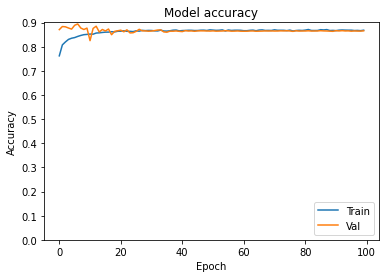

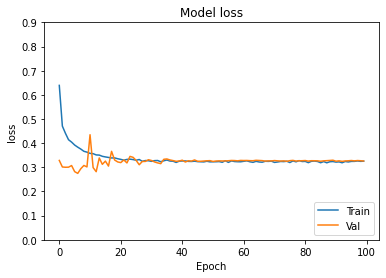

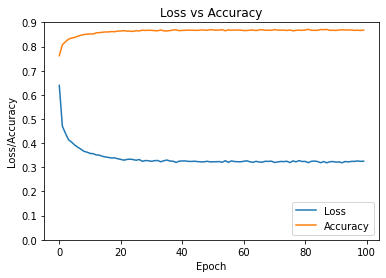

In [ ]:
accuracy_loss_plot(history)

### Discussion on Data Augmentation Perfomance

From the accuracy and loss plots above, the gap between the training and validation sets is quite small. Augmenting the data had a good regularization effect on the data. The training accuracy is 88.35%% and the validation and test accuracy are 86.38% and 86.43% respectively. 

Even though there is little overfitting after applying these augmentations, the accuracy is worse than it was before Data Augmentation is applied. This may be because, if there are types of augmentation that are not relevant to the test set, certain types of data augmentation may not be effective. For example, for an object recognition model that will mimic how humans see in real life, these data augmentation techniques above may be relevant in that context. 

In our context however, the images in the test set are not likely to be zoomed, sheared or flipped. In the next section, we will look at a different data augmentation technique that is more relevant in our context.

### Improving Accuracy of Deeper Model
#### Elastic distortion
     
  Elastic distortion is another method of data augmentation, as opposed to affine distortion which is the method Keras uses. Elastic distortion does a good job of mimicking variations in human hand writing. A method for applying elastic distortion to the MNIST data set is described by Simard, Steinkraus, and Plattin [2]. We applied this to our Fashion MNIST model, because it is similar to MNIST.

The method outline:

- Create random displacement fields for height and width, with values randomly sampled from  unif(−1,1) . A displacement field defines a direction and magnitude to move a pixel.
- Smooth the fields with a gaussian filter. Since  μ=0  for  unif(−1,1) , most values will be close to  0  after the gaussian filter is applied. Thus most of the changes made by the fields will be small (assuming the gaussian filter's sigma value is large enough).
- Multiply the fields by a scaling factor to control intensity of the deformations.
- Use interpolation to apply the displacement fields to the image.

#### Cosine Annealing
Cosine annealing [3] [4] is a relatively new learning rate annealing technique that does a more thorough job of exploring the model's solution space by using warm restarts to break out of local minimums. As the learning rate decreases, the model gets more precise but may also get stuck in a particular state. Warm restarts raise the learning rate to get the model unstuck. I found that, as long as the model doesn't overfit on the training set too much, continual warm restarts can potentially discover better and better models.
#### Adamax 
The Adam optimizer uses an exponentially decaying weighted average estimate of the variance of the gradient in its formulation. 
The variance is equivalent to the second moment or L2 norm of the gradient. The  $L_{n}$ =  norm is defined as:

$L_{1} = g$
 
$L_{2} = \sqrt{g^2}$
 
$L_{3} = \sqrt[3]{g^3}$
 
$L_{n} = \sqrt[n]{g^n}$
 
Adamax 
$L_{\infty} = \sqrt[\infty]{g^\infty}$
 
The infinite norm is numerically stable because it has asymptotically convergent behavior (assuming  g ∈ [0,1] ). **AdaMax is a generalisation of Adam from the $L_{2}$ norm to the $L_{\infty}$ norm.**
 
AdaMax is more robust to gradient update noise than Adam is, and has better numerical stability. [5]


In [ ]:
from scipy.ndimage.filters import gaussian_filter
from scipy.ndimage.interpolation import map_coordinates

def elastic_transform(image, alpha_range, sigma, random_state=None):
    """Elastic deformation of images as described in [Simard2003]_.
    .. [Simard2003] Simard, Steinkraus and Platt, "Best Practices for
       Convolutional Neural Networks applied to Visual Document Analysis", in
       Proc. of the International Conference on Document Analysis and
       Recognition, 2003.
       
   # Arguments
       image: Numpy array with shape (height, width, channels). 
       alpha_range: Float for fixed value or [lower, upper] for random value from uniform distribution.
           Controls intensity of deformation.
       sigma: Float, sigma of gaussian filter that smooths the displacement fields.
       random_state: `numpy.random.RandomState` object for generating displacement fields.
    """
    
    if random_state is None:
        random_state = np.random.RandomState(None)
        
    if np.isscalar(alpha_range):
        alpha = alpha_range
    else:
        alpha = np.random.uniform(low=alpha_range[0], high=alpha_range[1])
        shape = image.shape
    dx = gaussian_filter((random_state.rand(*shape) * 2 - 1), sigma) * alpha
    dy = gaussian_filter((random_state.rand(*shape) * 2 - 1), sigma) * alpha

    x, y, z = np.meshgrid(np.arange(shape[0]), np.arange(shape[1]), np.arange(shape[2]), indexing='ij')
    indices = np.reshape(x+dx, (-1, 1)), np.reshape(y+dy, (-1, 1)), np.reshape(z, (-1, 1))

    return map_coordinates(image, indices, order=1, mode='reflect').reshape(shape)

In [ ]:
from keras import backend as K
class CosineAnneal(tf.keras.callbacks.Callback):
    """"Cosine annealing with warm restarts.
    
    As described in section 3 of "SGDR: Stochastic Gradient Descent with Warm Restarts" (Loshchilov & Hutter 2017).
    
    # Arguments
        max_lr: Maximum value of learning rate range.
        min_lr: Minimum value of learning rate range.
        T: Number of epochs between warm restarts.
        T_mul: At warm restarts, multiply `T` by this amount.
    """
    def __init__(self, max_lr, min_lr, T, T_mul=1):
        self.max_lr = max_lr
        self.min_lr = min_lr
        self.T = T
        self.T_cur = 0
        self.T_mul = T_mul
        self.step = 0
        
    def on_batch_begin(self, batch, logs=None):
        if self.T <= self.T_cur:
            self.T *= self.T_mul
            self.T_cur = 0
            self.step = 0
        lr = self.min_lr + 0.5 * (self.max_lr - self.min_lr) * (1 + np.cos(self.T_cur * np.pi / self.T))        
        K.set_value(self.model.optimizer.lr, lr)
        # use self.step to avoid floating point arithmetic errors at warm restarts
        self.step += 1
        self.T_cur = self.step / self.params['steps']

    def on_epoch_end(self, epoch, logs=None):
        logs = logs or {}
        logs['lr'] = K.get_value(self.model.optimizer.lr)

In [ ]:
#using Adamax optimizer
from keras import optimizers
model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              optimizer=optimizers.Adamax(lr=0.006, beta_1=0.49, beta_2=0.999),
              metrics=['accuracy'])

In [ ]:
batch_size = 128
epochs = 100

# setup callbacks
annealer = CosineAnneal(max_lr=0.006, min_lr=0.001, T=10, T_mul=1)


# define data augmentations
datagen = ImageDataGenerator(
    height_shift_range=2,
    horizontal_flip=True,
    preprocessing_function=lambda x: elastic_transform(x, alpha_range=[10, 12], sigma=4)
)


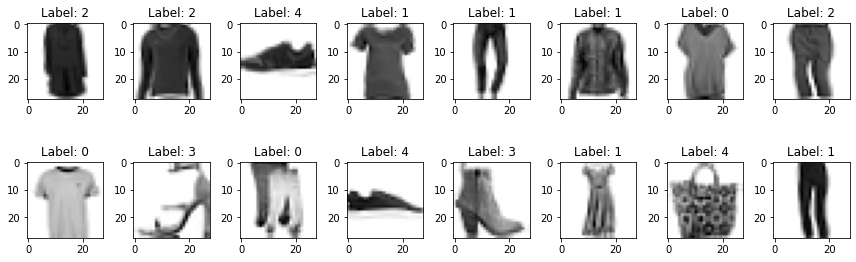

CPU times: user 1.57 s, sys: 133 ms, total: 1.7 s
Wall time: 1.57 s


In [ ]:
%%time
#plot of new augmentation technique
plot_augmented_data(X_train, y_train)

### Discussion of Data Augmentation (ii)

Elastic distortion utilises a Gaussian filter for smoothing, smoothing can result in a slight blur which is relevant to our dataset. Some images in the non-augmented data have more blur than others, making them difficult to distinguish. Adding different degrees of blur at random, using elastic distortion, helps our model to generalize better on images. If the alpha parameter is too high, it would result in extreme blurring and deformation of the original images. 

In [ ]:
%%time
# train model
with tf.device('/device:GPU:0'):
  history_final = model.fit_generator(
    datagen.flow(X_train, y_train, batch_size=batch_size, shuffle=True),
    epochs=epochs,
    steps_per_epoch=(len(y_train) - 1) // batch_size + 1,
    validation_data=(X_val, y_val),
    callbacks=[annealer])

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/100
375/375 [==============================] - 48s 126ms/step - loss: 0.3330 - accuracy: 0.8685 - val_loss: 0.2608 - val_accuracy: 0.8975
Epoch 2/100
375/375 [==============================] - 47s 126ms/step - loss: 0.2689 - accuracy: 0.8928 - val_loss: 0.2581 - val_accuracy: 0.8967
Epoch 3/100
375/375 [==============================] - 48s 127ms/step - loss: 0.2557 - accuracy: 0.8977 - val_loss: 0.2784 - val_accuracy: 0.8895
Epoch 4/100
375/375 [==============================] - 47s 126ms/step - loss: 0.2459 - accuracy: 0.9015 - val_loss: 0.2204 - val_accuracy: 0.9130
Epoch 5/100
375/375 [==============================] - 47s 126ms/step - loss: 0.2343 - accuracy: 0.9052 - val_loss: 0.2810 - val_accuracy: 0.8880
Epoch 6/100
375/375 [==============================] - 47s 126ms/step - loss: 0.2335 - accuracy: 0.9054 - val_loss: 0.2347 - val_accuracy: 0.9078
Epoch 7/100
375/375 [==============================] - 47s 127ms/step - loss: 0.2222 - accuracy: 0.9094 - val_loss: 0.2410 -

In [ ]:
%%time
#test accuracy of model brief with augmented data
with tf.device('/device:GPU:0'):
  test_loss, test_acc = model.evaluate(X_test,  y_test, verbose=2)
print("Test Accuracy of Brief Model with Augmented Data", test_acc)

188/188 - 0s - loss: 0.2161 - accuracy: 0.9132
Test Accuracy of Brief Model with Augmented Data 0.9131666421890259
CPU times: user 398 ms, sys: 27.5 ms, total: 425 ms
Wall time: 336 ms


In [ ]:
history_list.append(history_final)

In [94]:
print_accuracy(model, y_train, y_val, y_test)

Train Set Accuracy: 	 95.17
Train Set Precision: 	 0.95
Train Set Recall: 	 0.95
Train Set F score: 	 0.95

Val Set Accuracy: 	 91.33
Val Set Precision: 	 0.91
Val Set Recall: 	 0.91
Val Set F score: 	 0.91

Test Set Accuracy: 	 91.32
Test Set Precision: 	 0.91
Test Set Recall: 	 0.91
Test Set F score: 	 0.91



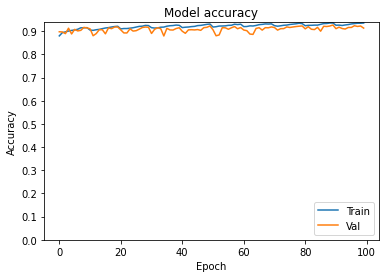

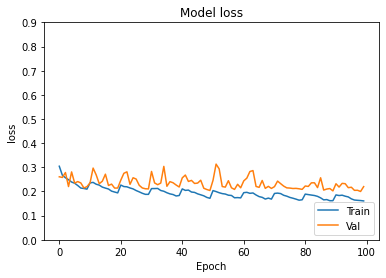

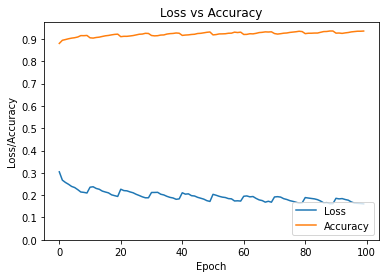

In [ ]:
accuracy_loss_plot(history_final)

### Discussion of Accuracy Improvement techniques

#### Accuracy plots
This model achieves an accuracy of up to 96% on the training data. The validation and test sets achieve an accuracy of up to 92.67% and 92.45%. The accuracy values for the training and validation sets are close together. 
#### Loss plots
The loss plots for the training and validation sets are close together. This shows that there is no more overfitting. 


In [ ]:
y_test[:20]

array([4., 0., 2., 4., 0., 3., 2., 2., 2., 0., 4., 2., 3., 2., 1., 1., 4.,
       4., 4., 4.])

In [ ]:
# Predict the values from the validation dataset
y_pred = model.predict(X_test)
# Convert predictions classes to one hot vectors 
y_pred_classes = np.argmax(y_pred,axis = 1) 
#replace classes with original values
y_pred_classes = replace_values(y_pred_classes, [0, 1, 2, 3, 4], [1, 2, 3, 4, 5])

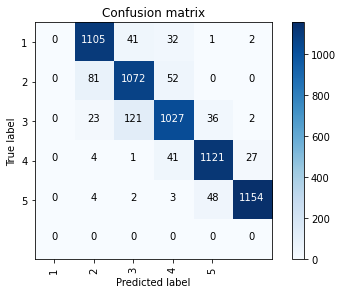

In [ ]:
#y_true = np.argmax(y_test,axis = 1) 
# compute the confusion matrix
confusion_mtx = confusion_matrix(y_test, y_pred_classes) 
# plot the confusion matrix
plot_confusion_matrix(confusion_mtx, 
            classes = [1,2,3,4,5])

### Hyperparameter Choices

Number of Epochs

| Model | No of Epochs|
|---|---|
| Brief Model | 100 |
| Deeper Model | 80 |
| Deeper Model with Data Augmentation | 100|
| Deeper Model with Accuracy Improvement | 100|
| ResNet Model | 100|
| VGGNet Model | 100|


80 epochs were chosen for the vanilla Deeper Model because beyond 80 epochs, it overfit rapidly. 

Optimizers

| Model | Optimizer |
|---|---|
| Brief Model | Adam |
| Deeper Model | Adam |
| Deeper Model with Data Augmentation | Adam |
| Deeper Model with Accuracy Improvement | Adamax |
| ResNet Model | Adam |
| VGGNet Model | Adam |

Batch size

| Model | Batch Size |
|---|---|
| Brief Model | 128 |
| Deeper Model | 128 |
| Deeper Model with Data Augmentation | 128 |
| Deeper Model with Accuracy Improvement | 128 |
| ResNet Model | 128 |
| VGGNet Model | 128 |

Loss function

The Loss function is the function used to evaluate a candidate solution (i.e. a set of weights). Our model uses Sparse Categorical Cross Entropy. 


## Transfer Learning

ResNet

ResNet is a network architecture that posseses residual blocks with skip connections, that enable the model to be extremely deep. These skip connections enabled the network to be up to 152 layers with no vanishing or exploding gradient problems during training. 


In [ ]:
#Resnet
base_model = tf.keras.applications.ResNet152(weights = 'imagenet', include_top = False, input_shape = (32,32,3))
for layer in base_model.layers:
    layer.trainable = False

In [ ]:
x = layers.Flatten()(base_model.output)
x = layers.Dense(1000, activation='relu')(x)
predictions = layers.Dense(5, activation = 'softmax')(x)

In [ ]:
resnet_model = Model(inputs = base_model.input, outputs = predictions)
resnet_model.compile(optimizer='adam', loss=losses.sparse_categorical_crossentropy, metrics=['accuracy'])

In [ ]:
#plot_model(resnet_model, show_shapes=True, rankdir="TD")

In [ ]:
from sklearn.model_selection import train_test_split
# Splitting the data into train, test, and validation sets
X_train_tl, X_test_tl, y_train, y_test = train_test_split(data['features'], target, test_size=0.2, random_state=275)
X_val_tl, X_test_tl, y_val, y_test = train_test_split(X_test_tl, y_test, test_size=0.5, random_state=275)

In [ ]:
#pad the images to achieve 32 x 32
X_train_tl = tf.pad(X_train_tl, [[0, 0], [2,2], [2,2]])
X_val_tl = tf.pad(X_val_tl, [[0, 0], [2,2], [2,2]])
X_test_tl = tf.pad(X_test_tl, [[0, 0], [2,2], [2,2]])
#expand and repeat to create 3 channels
X_train_tl = tf.expand_dims(X_train_tl, axis=3, name=None)
X_val_tl = tf.expand_dims(X_val_tl, axis=3, name=None)
X_test_tl = tf.expand_dims(X_test_tl, axis=3, name=None)

In [ ]:
print(X_train_tl.shape, '\n')
print(y_train.shape, '\n')
print(X_val_tl.shape, '\n')
print(X_test_tl.shape, '\n')

(48000, 32, 32, 1) 

(48000,) 

(6000, 32, 32, 1) 

(6000, 32, 32, 1) 



In [ ]:
X_train_tl = tf.repeat(X_train_tl, 3, axis=3)
X_val_tl = tf.repeat(X_val_tl, 3, axis=3)
X_test_tl = tf.repeat(X_test_tl, 3, axis=3)

In [ ]:
print(X_train_tl.shape, '\n')
print(y_train.shape, '\n')
print(X_val_tl.shape, '\n')
print(X_test_tl.shape, '\n')

(48000, 32, 32, 3) 

(48000,) 

(6000, 32, 32, 3) 

(6000, 32, 32, 3) 



In [ ]:
%%time
with tf.device('/device:GPU:0'):
  history_resnet = resnet_model.fit(X_train_tl, y_train, batch_size=128, epochs=100, validation_data=(X_val_tl, y_val))

Epoch 1/100
375/375 [==============================] - 26s 52ms/step - loss: 1.1156 - accuracy: 0.5377 - val_loss: 0.8029 - val_accuracy: 0.6733
Epoch 2/100
375/375 [==============================] - 17s 45ms/step - loss: 0.8012 - accuracy: 0.6768 - val_loss: 0.7671 - val_accuracy: 0.6795
Epoch 3/100
375/375 [==============================] - 17s 45ms/step - loss: 0.7469 - accuracy: 0.6968 - val_loss: 0.7422 - val_accuracy: 0.6898
Epoch 4/100
375/375 [==============================] - 17s 45ms/step - loss: 0.7193 - accuracy: 0.7036 - val_loss: 0.7064 - val_accuracy: 0.7040
Epoch 5/100
375/375 [==============================] - 17s 45ms/step - loss: 0.6991 - accuracy: 0.7108 - val_loss: 0.6842 - val_accuracy: 0.7148
Epoch 6/100
375/375 [==============================] - 17s 45ms/step - loss: 0.6807 - accuracy: 0.7165 - val_loss: 0.7160 - val_accuracy: 0.6980
Epoch 7/100
375/375 [==============================] - 17s 45ms/step - loss: 0.6750 - accuracy: 0.7195 - val_loss: 0.6759 - val_ac

In [95]:
%%time
resnet_model.evaluate(X_test_tl, y_test)

188/188 [==============================] - 5s 27ms/step - loss: 0.4626 - accuracy: 0.8113
CPU times: user 4.34 s, sys: 134 ms, total: 4.48 s
Wall time: 5.16 s


[0.4625893831253052, 0.8113333582878113]

In [96]:
 history_list.append(history_resnet)

In [97]:
print_accuracy(resnet_model, y_train, y_val, y_test, mode=1)

Train Set Accuracy: 	 82.23
Train Set Precision: 	 0.82
Train Set Recall: 	 0.82
Train Set F score: 	 0.82

Val Set Accuracy: 	 80.28
Val Set Precision: 	 0.8
Val Set Recall: 	 0.8
Val Set F score: 	 0.8

Test Set Accuracy: 	 81.13
Test Set Precision: 	 0.81
Test Set Recall: 	 0.81
Test Set F score: 	 0.81



### Transfer Learning with ResNet Performance

Training Accuracy - 82%

Validation Accuracy - 80%

Test Accuracy - 81%


This produces the worst accuracy out of all the models

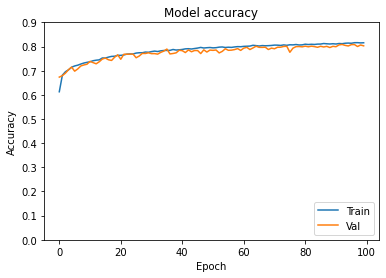

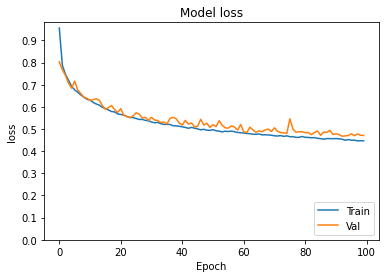

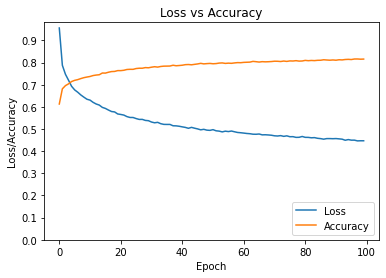

In [98]:
accuracy_loss_plot(history_resnet)

### VGGNet

The input to VGG based convNet is a 224*224 RGB image. The training images are passed through a stack of convolution layers. There are total of 13 convolutional layers and 3 fully connected layers in VGG16 architecture. 

VGG-16 was one of the best performing architecture in ILSVRC challenge 2014.It was the runner up in classification task with top-5 classification error of 7.32% (only behind GoogLeNet with classification error 6.66%). It was also the winner of localization task with 25.32% localization error.

In [ ]:
base_model = tf.keras.applications.VGG16(weights = 'imagenet', include_top = False, input_shape = (32,32,3))
for layer in base_model.layers:
  layer.trainable = False
base_model.summary()


In [ ]:
x = layers.Flatten()(base_model.output)
x = layers.Dense(4096, activation='relu')(x)
x = layers.Dropout(0.5)(x)
x = layers.Dense(4096, activation='relu')(x)
x = layers.Dropout(0.5)(x)
predictions = layers.Dense(5, activation = 'softmax')(x)
head_model = Model(inputs = base_model.input, outputs = predictions)
head_model.compile(optimizer='adam', loss=losses.sparse_categorical_crossentropy, metrics=['accuracy'])

In [ ]:
plot_model(head_model, show_shapes=True, rankdir="TD")

In [ ]:
head_model.summary()

In [ ]:
%%time
with tf.device('/device:GPU:0'):
  history = head_model.fit(X_train_tl, y_train, batch_size=128, epochs=100, validation_data=(X_val_tl, y_val))

Epoch 1/100
375/375 [==============================] - 8s 18ms/step - loss: 0.9240 - accuracy: 0.6591 - val_loss: 0.4892 - val_accuracy: 0.7918
Epoch 2/100
375/375 [==============================] - 6s 17ms/step - loss: 0.5371 - accuracy: 0.7795 - val_loss: 0.4494 - val_accuracy: 0.8158
Epoch 3/100
375/375 [==============================] - 6s 17ms/step - loss: 0.4933 - accuracy: 0.7987 - val_loss: 0.4518 - val_accuracy: 0.8128
Epoch 4/100
375/375 [==============================] - 6s 17ms/step - loss: 0.4719 - accuracy: 0.8074 - val_loss: 0.3977 - val_accuracy: 0.8385
Epoch 5/100
375/375 [==============================] - 6s 17ms/step - loss: 0.4497 - accuracy: 0.8200 - val_loss: 0.4231 - val_accuracy: 0.8255
Epoch 6/100
375/375 [==============================] - 6s 17ms/step - loss: 0.4471 - accuracy: 0.8207 - val_loss: 0.3999 - val_accuracy: 0.8283
Epoch 7/100
375/375 [==============================] - 6s 17ms/step - loss: 0.4310 - accuracy: 0.8274 - val_loss: 0.3840 - val_accuracy:

In [ ]:
%%time
head_model.evaluate(X_test_tl, y_test)

188/188 [==============================] - 2s 8ms/step - loss: 0.3900 - accuracy: 0.8542
CPU times: user 1.03 s, sys: 197 ms, total: 1.23 s
Wall time: 1.77 s


[0.39000391960144043, 0.8541666865348816]

In [ ]:
history_list.append(history)

In [ ]:
print_accuracy(head_model, y_train, y_val, y_test, mode=1)

Train Set Accuracy: 	 92.92
Train Set Precision: 	 0.93
Train Set Recall: 	 0.93
Train Set F score: 	 0.93

Val Set Accuracy: 	 86.78
Val Set Precision: 	 0.87
Val Set Recall: 	 0.87
Val Set F score: 	 0.87

Test Set Accuracy: 	 85.42
Test Set Precision: 	 0.86
Test Set Recall: 	 0.85
Test Set F score: 	 0.85



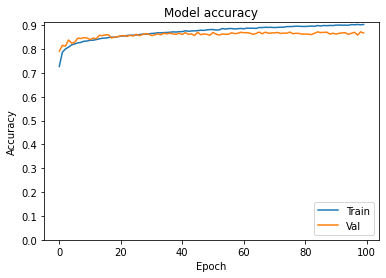

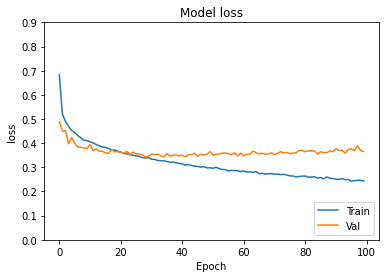

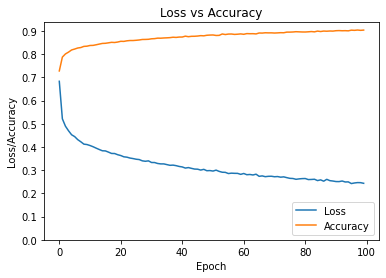

In [ ]:
accuracy_loss_plot(history)

### Transfer Learning with VGGNet Performance

Training Accuracy - 90%

Validation Accuracy - 86%

Test Accuracy - 85%


There is overfitting in with this model. This is probably because the VGGNet architecture is too deep for this task. 

## Comparison of Different Models

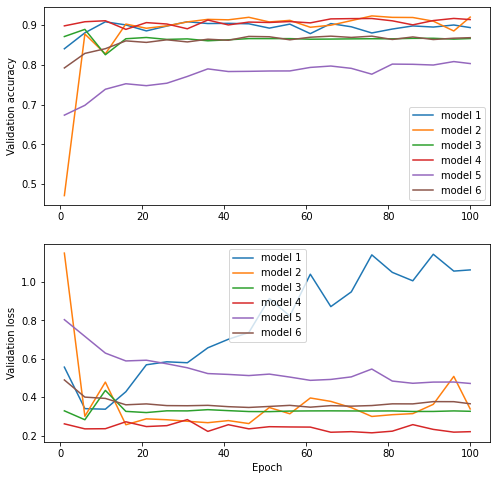

In [ ]:
fig, (ax1, ax2) = plt.subplots(2, figsize=(8, 8))
count = 1
epochs = list(range(1,100, 5))
epochs.append(100)
for history in history_list:
    label = 'model ' + str(count)
    val_accuracy = [history.history['val_accuracy'][i] for i in range(len(history.history['val_accuracy'])) if i%5 == 0]
    val_loss = [history.history['val_loss'][i] for i in range(len(history.history['val_loss'])) if i%5 == 0]
    val_accuracy.append(history.history['val_accuracy'][-1])
    val_loss.append(history.history['val_loss'][-1])
    ax1.plot(epochs, val_accuracy, label= label)
    ax2.plot(epochs, val_loss, label=label)
    count += 1
    
ax1.set_ylabel('Validation accuracy')
ax2.set_ylabel('Validation loss')
ax2.set_xlabel('Epoch')
ax1.legend()
ax2.legend()

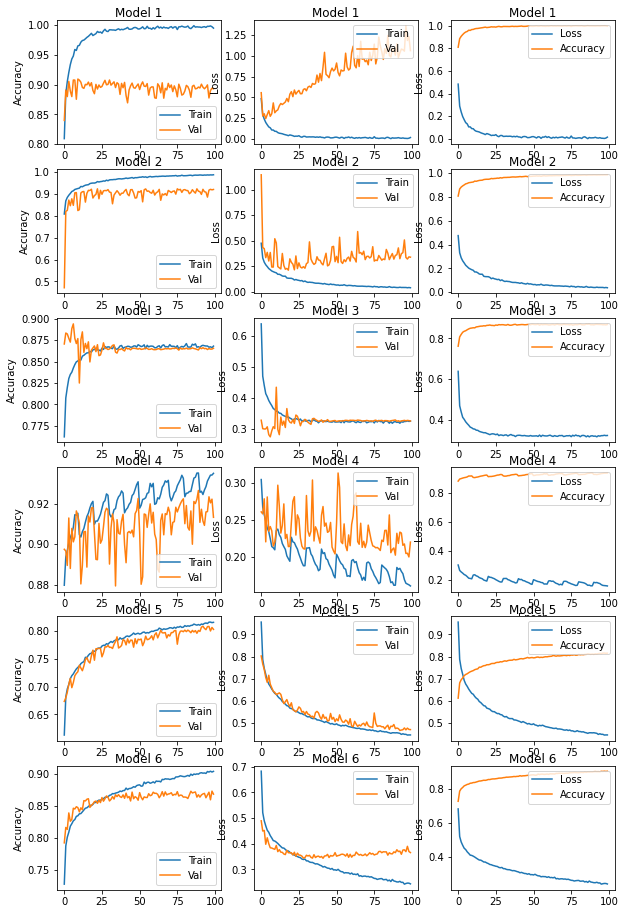

In [ ]:
compare_accuracy_loss(history_list)

### Kaggle Submission

In [ ]:
kaggle_data = np.load('/content/drive/MyDrive/mnist/fashion_mnist_dataset_kaggle_test.npy', allow_pickle=True).item()

In [ ]:
kaggle_data

In [ ]:

# Predicting the test set result with optimized model
kaggle_data_test = kaggle_data['features'].reshape((-1, 28, 28, 1))
scores = model.predict(kaggle_data_test)
#convert outputs from 0 - 4 to 1 -5



In [ ]:
#visualize
predictions = np.argmax(scores, axis=1)
predictions[0:20]

array([3, 2, 1, 0, 0, 1, 1, 0, 2, 4, 2, 3, 4, 1, 3, 0, 0, 2, 4, 1])

In [ ]:
targets = replace_values(predictions, [0, 1, 2, 3, 4], [1, 2, 3, 4, 5])

In [ ]:
result = pd.DataFrame(columns=['id','target'])
result['id'] = kaggle_data['id']
result['target'] = targets

result.set_index(keys='id', inplace=True)

result.to_csv('mnist_submission.csv')
from google.colab import files
files.download("mnist_submission.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

References

1. https://www.kaggle.com/sainiamit/fashion-mnist-with-92-accuracy-in-cnn
2. https://www.microsoft.com/en-us/research/wp-content/uploads/2003/08/icdar03.pdf
3. https://arxiv.org/abs/1608.03983
4.https://www.kaggle.com/babbler/mnist-data-augmentation-with-elastic-distortion
5. https://www.kaggle.com/residentmario/keras-optimizers?scriptVersionId=8011721&cellId=15